In [4]:
#Importing The Required Libraries & Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [5]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/614.7 kB 326.8 kB/s eta 0:00:02
   -------------- ------------------------- 225.3/614.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.8 MB/s eta 0:00:00
   -----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [6]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the data
df = pd.read_csv('exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [8]:
# Initial Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [9]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [10]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [11]:
df.shape

(7588, 2)

In [12]:
df.duplicated().sum()

0

In [13]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [14]:
# Data Preprocessing
#Changing the data type of Date column as Date using pandas command
df['date'] = pd.to_datetime(df['date'])

In [18]:
#Changing the Date columns as the index column of the dataset and also displaying the first five records of the dataset
df.set_index('date',inplace = True)

KeyError: "None of ['date'] are in the columns"

In [19]:
df.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


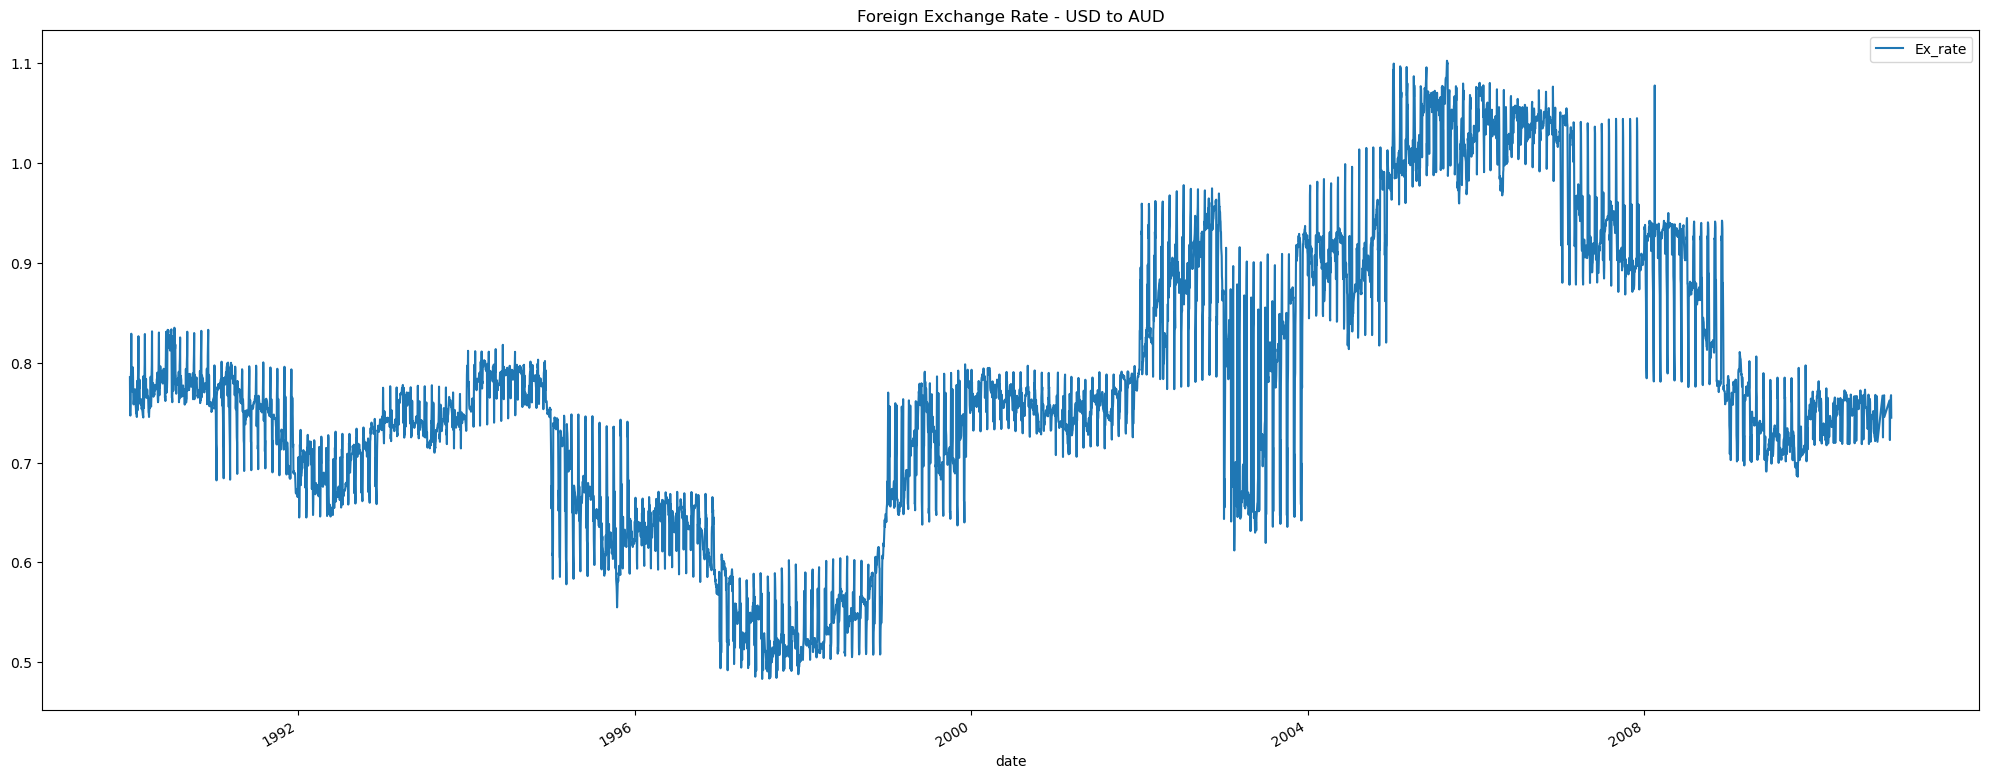

In [20]:
# Data Processing & Visualization
#Plotting the line graph to show the data trend in the dataset 

df.plot(figsize = (25,10))
plt.title('Foreign Exchange Rate - USD to AUD')
plt.savefig('Foreign Exchange Rate - USD to AUD.png')
plt.show()

In [21]:
#Resampling the dataset to weekly frequency since the given data has more number of observations that takes longer time to
#fit or predict the model. And along with that showing number of observation after resampling and displaying the first five
#record of resampled datase

In [22]:
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  1093


,Ex_rate
date,
1990-01-07,0.778300
1990-01-14,0.781486
1990-01-21,0.764871
1990-01-28,0.762429
1990-02-04,0.757243


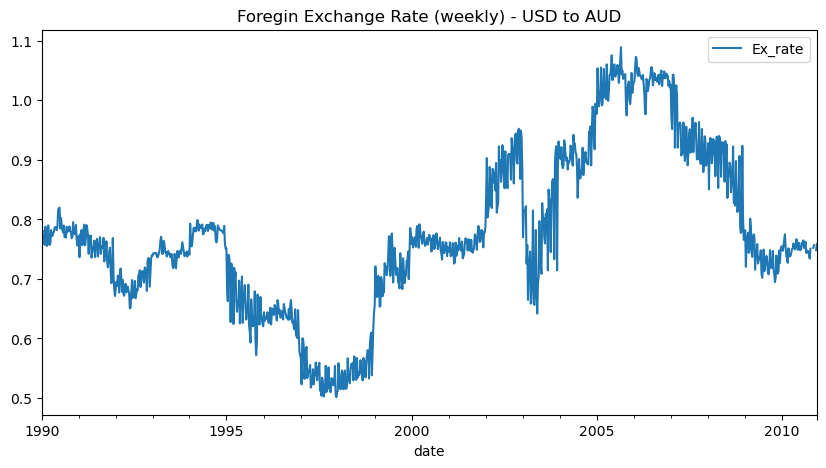

In [23]:
#Plotting the line graph to show the data trend in the weekly resampled dataset 
df_week.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (weekly) - USD to AUD')
plt.show()

In [ ]:
# Resampling the dataset to monthly frequency since the given data has more number of observations
# that takes longer time to fit or predict the model. And along with that showing number of observation
# after resampling and displaying the first five record of resampled dataset



In [24]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  252


,Ex_rate
date,
1990-01-31,0.769661
1990-02-28,0.765589
1990-03-31,0.768568
1990-04-30,0.777073
1990-05-31,0.784868


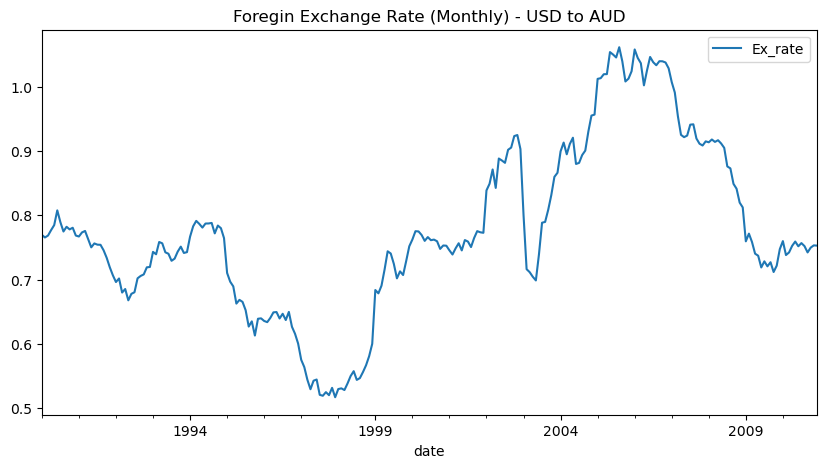

In [25]:
#Plotting the line graph to show the data trend in the monthly resampled dataset
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - USD to AUD')
plt.show()

In [ ]:
# Resampling the dataset to yearly frequency since the given data has more number of observations
# that takes longer time to fit or predict the model. And along with that showing number of observation
# after resampling and displaying the first five record of resampled dataset



In [26]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  21


,Ex_rate
date,
1990-12-31,0.778996
1991-12-31,0.749830
1992-12-31,0.695201
1993-12-31,0.743442
1994-12-31,0.781024


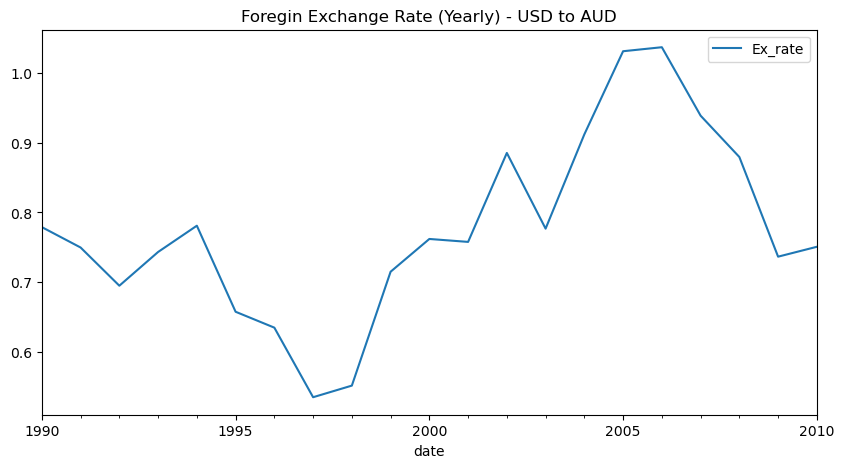

In [27]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - USD to AUD')
plt.show()

In [ ]:
# Plotting the scatter plot to show the data trend in the weekly resampled dataset.
# And by observing all the above resampled graph , weekly resampled data has more clear
# peak and perks among all resample data



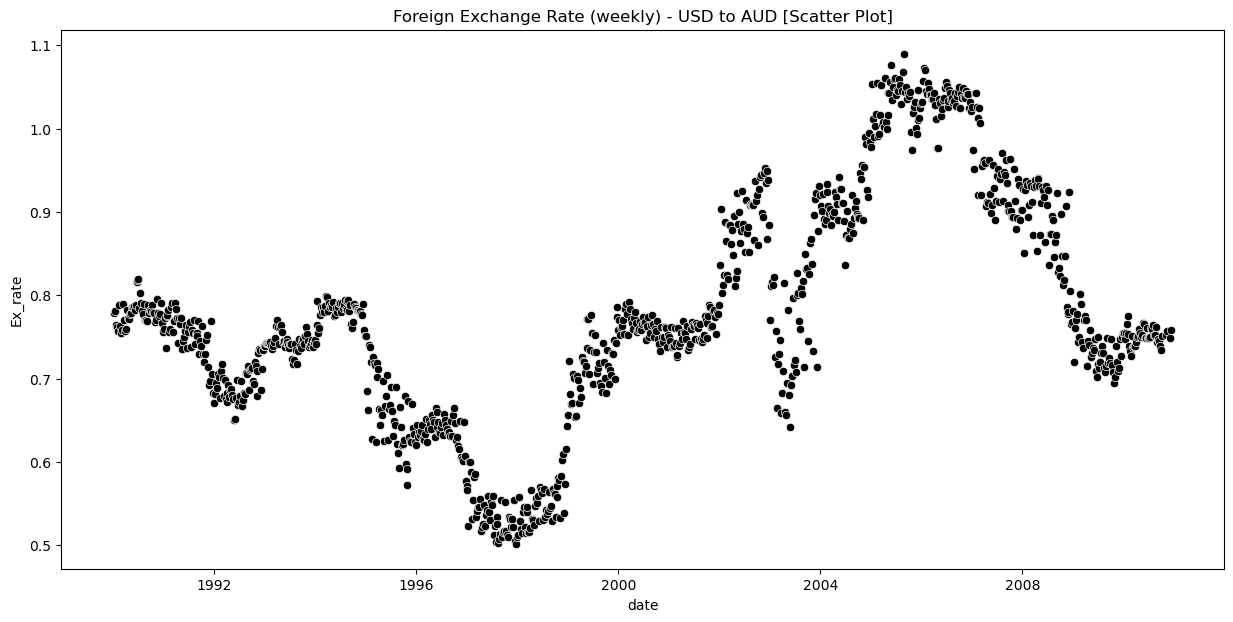

In [28]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df_week.index , y = df_week.Ex_rate , color = 'black')
plt.title('Foreign Exchange Rate (weekly) - USD to AUD [Scatter Plot]')
plt.show()

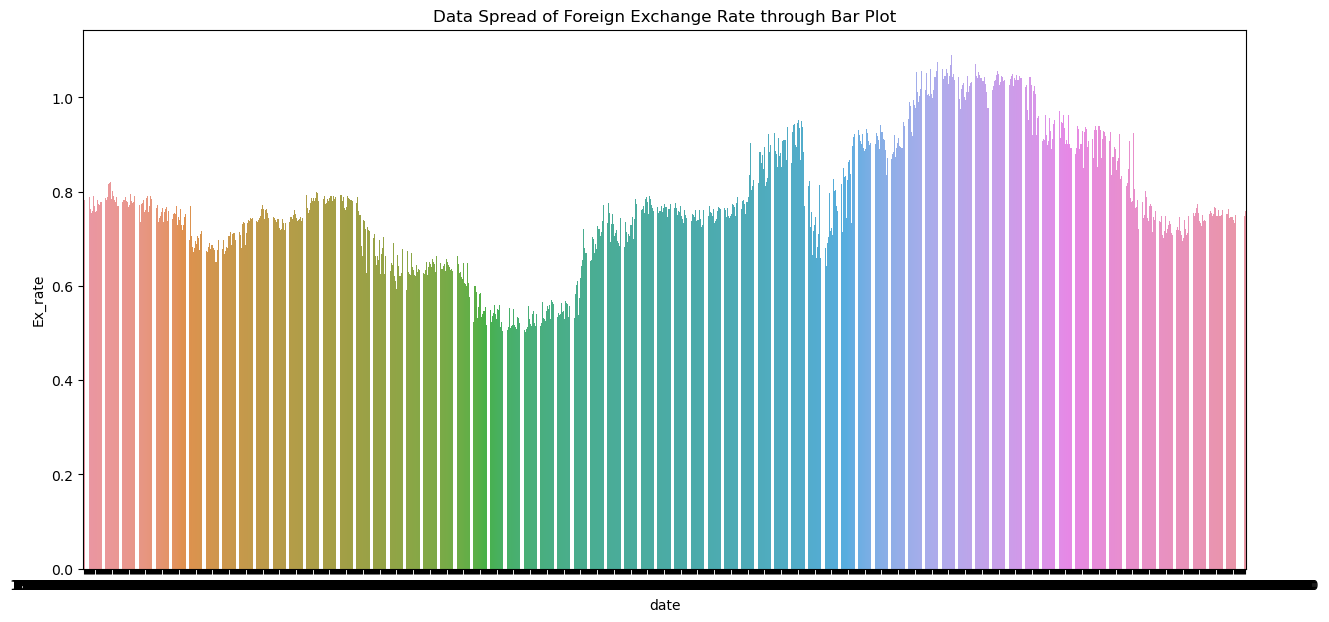

In [29]:
#Plotting the dist plot using seaborn to show the data spread in the resampled weekly dataset
sns.barplot(data = df_week,x = df_week.index , y = df_week.Ex_rate)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
plt.show()

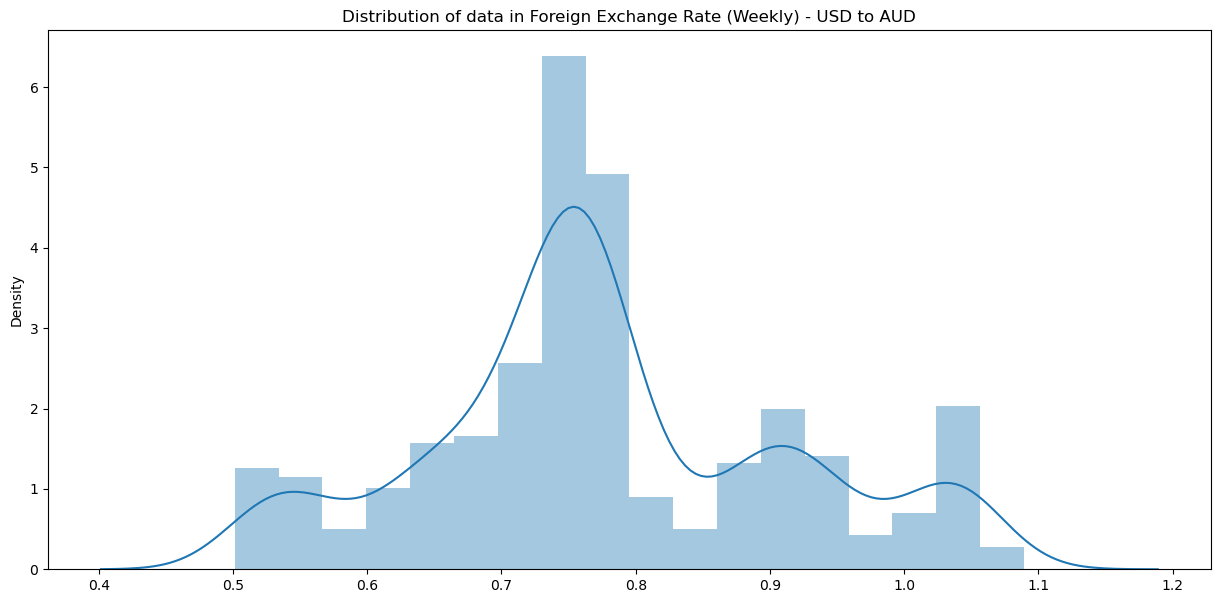

In [30]:
#Plotting the dist plot using seaborn to show the data distribution in the resampled weekly dataset.
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - USD to AUD')
plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - Euro to USD.png')
plt.show()

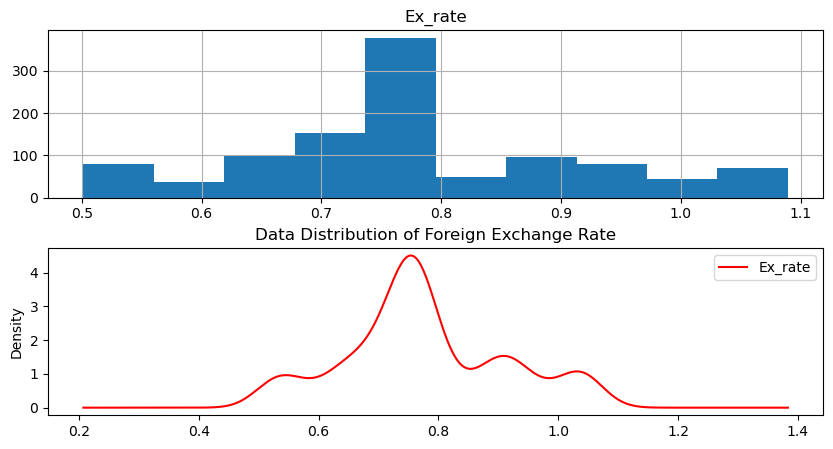

In [31]:
#Plotting the histogram and KDE line graph to show the distribution of data in the dataset.
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

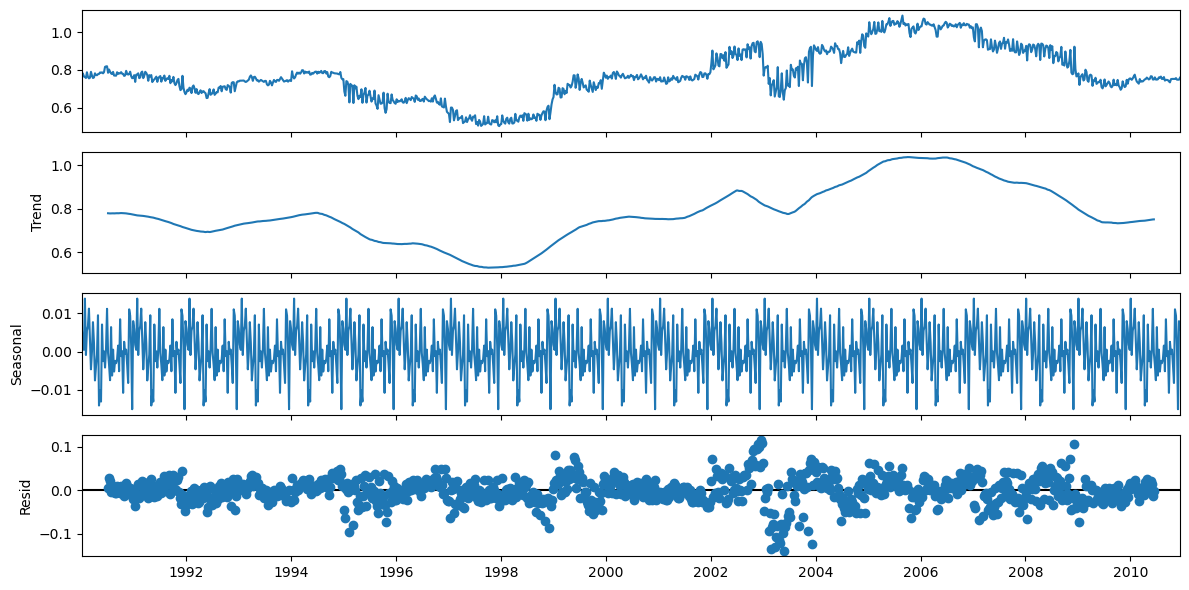

In [32]:
#Plotting the graph with Seasonal Decomposition function to show the data discription ,trend , seasonal , residuals
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_week.fillna(method='bfill'), period = 52 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

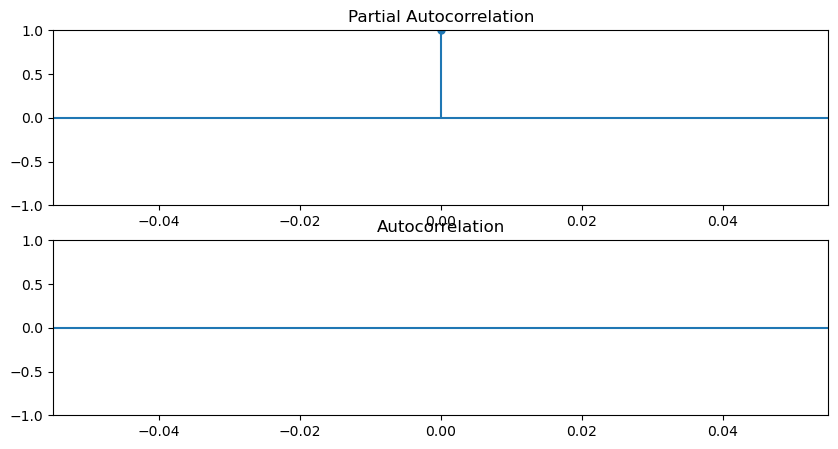

In [33]:
#Plotting the graph with Partial Autocorrelation and Auto Correleation of the data from the dataset and saving the graph as PNG file
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_week , lags = 5 , ax = ax1)
ax2 = plot_acf(df_week , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation.png')
plt.show()

In [35]:
# Data Transformation

# The adf_check() function performs an Augmented Dickey-Fuller test on a time series.
# The test is used to determine whether a time series is stationary or not. If the
# p-value of the test is less than or equal to 0.05, then there is strong evidence 
# against the null hypothesis, and the series is considered to be stationary. Otherwise, the
# series is considered to be non-stationary. The function takes a time series as input and returns
# the results of the test. The results are printed to the console, along with a message indicating
# whether the series is stationary or not.


In [36]:
# Check for missing values
missing_values = df_week.isnull().sum()
print(missing_values)

Ex_rate    5
dtype: int64


In [37]:
# Check for infinite values
infinite_values = np.isinf(df_week).sum()
print(infinite_values)

Ex_rate    0
dtype: int64


In [38]:
# Remove rows with missing values
df_week = df_week.dropna()

In [39]:
# Check for missing values
missing_values = df_week.isnull().sum()
print(missing_values)

Ex_rate    0
dtype: int64


In [40]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [41]:
adf_check(df_week)

Test Statistic                   -1.808866
p-value                           0.376069
Number of Lags Used              22.000000
Number of Observations Used    1065.000000
Critical Value (1%)              -3.436505
Critical Value (5%)              -2.864258
Critical Value (10%)             -2.568217
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [42]:
# Since the time series is not a stationary , the resampled weekly 
# dataset is transformed as a new dataframe with first difference to
# make it as a stationary series. Along with that showing number of
# observation in the new dataframe and displaying the first five record of the new data frame

In [43]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week.head()

Count of weekly First Difference 1087


,Ex_rate
date,
1990-01-14,0.003186
1990-01-21,-0.016614
1990-01-28,-0.002443
1990-02-04,-0.005186
1990-02-11,0.030600


In [44]:
adf_check(df1_week)

Test Statistic                -5.898755e+00
p-value                        2.810497e-07
Number of Lags Used            2.100000e+01
Number of Observations Used    1.065000e+03
Critical Value (1%)           -3.436505e+00
Critical Value (5%)           -2.864258e+00
Critical Value (10%)          -2.568217e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


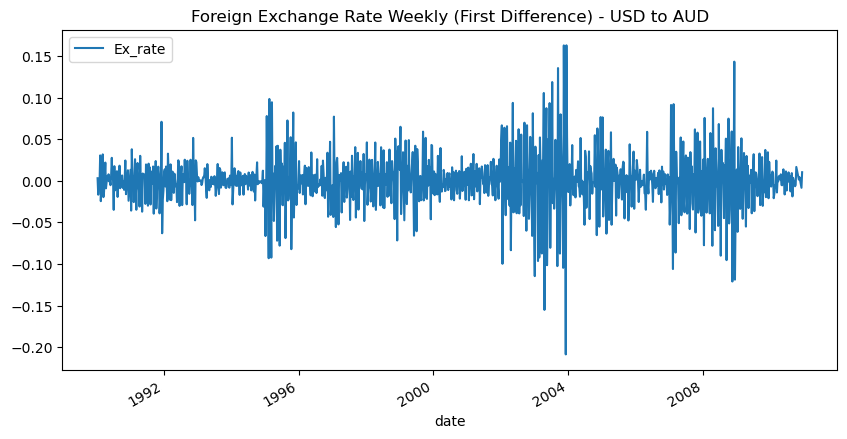

In [45]:
#Plotting the line graph to show the data trend in the transformed data from the resampled weekly dataset and saving the graph as PNG File
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - USD to AUD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference) - USD to AUD.png')
plt.show()

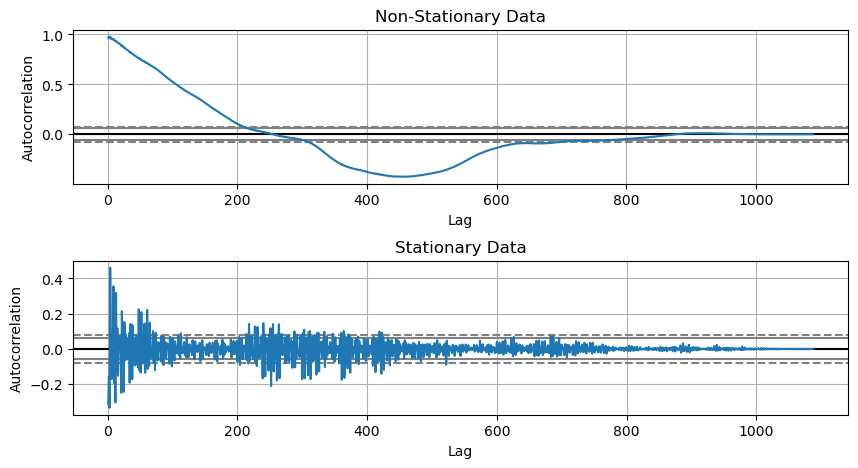

In [46]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_week , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [47]:
# Model Fitting
model = auto_arima(df_week , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4938.189, Time=4.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4433.972, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4545.126, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4749.536, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4435.972, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4759.870, Time=1.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4811.293, Time=2.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5107.529, Time=3.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5090.030, Time=3.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-5088.816, Time=4.64 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5107.994, Time=4.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4890.609, Time=4.26 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-5105.866, Time=5.37 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-5135.109, Time=5.68 sec
 ARIMA(2,1,4)(0,0,0

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1088
Model:               SARIMAX(5, 1, 5)   Log Likelihood                2630.390
Date:                Mon, 09 Sep 2024   AIC                          -5238.780
Time:                        14:26:30   BIC                          -5183.877
Sample:                             0   HQIC                         -5217.997
                               - 1088                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1601      0.234     -4.965      0.000      -1.618      -0.702
ar.L2         -0.4710      0.363     -1.296      0.195      -1.183       0.241
ar.L3         -0.6036      0.261     -2.312      0.021      -1.115      -0.092
ar.L4         -0.2200      0.263     -0.836      0.403      -0.736       0.296
ar.L5          0.2653      0.169      1.571      0.116      -0.066       0.596
ma.L1          0.7266      0.233      3.117      0.002       0.270       1.183
ma.L2         -0.2930      0.266     -1.101      0.271      -0.815       0.229
ma.L3         -0.0312      0.066     -0.469      0.639      -0.161       0.099
ma.L4          0.2392      0.050      4.806      0.000       0.142       0.337
ma.L5          0.0404      0.072      0.563      0.574      -0.100       0.181
sigma2         0.0005   1.15e-05     40.083      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.03   Jarque-Bera (JB):               885.02
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model = ARIMA(df_week , order = (5,1,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 1088
Model:                 ARIMA(5, 1, 2)   Log Likelihood                2585.666
Date:                Mon, 09 Sep 2024   AIC                          -5155.331
Time:                        14:26:38   BIC                          -5115.402
Sample:                             0   HQIC                         -5140.217
                               - 1088                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5022      0.030    -16.762      0.000      -0.561      -0.443
ar.L2          0.1980      0.034      5.893      0.000       0.132       0.264
ar.L3         -0.1493      0.019     -7.760      0.000      -0.187      -0.112
ar.L4          0.5655      0.024     23.944      0.000       0.519       0.612
ar.L5          0.7013      0.019     37.521      0.000       0.665       0.738
ma.L1          0.0246      0.031      0.789      0.430      -0.036       0.086
ma.L2         -0.7028      0.036    -19.689      0.000      -0.773      -0.633
sigma2         0.0005   1.33e-05     37.614      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               727.62
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

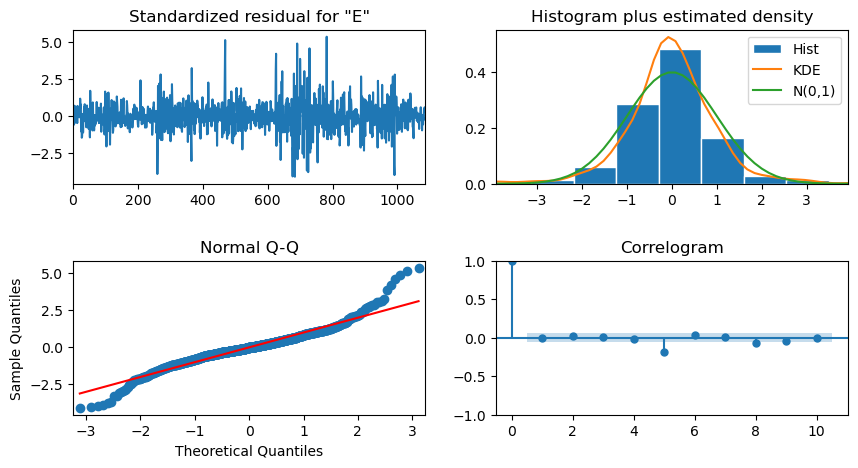

In [50]:
#Plotting the diagnostic plot for the fitted model to show the best fit of the model.
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [51]:
#Predicting the value using fitted model with whole resampled weekly data
predictions = result.predict(typ = 'levels')

In [52]:
# Model Evaluation
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_week['Ex_rate'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_week['Ex_rate'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_week['Ex_rate'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_week['Ex_rate'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['Ex_rate'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 94.15 % 

Mean Squared Error :  0.0010577049274012155 

Mean Absolute Error :  0.016462643667820936 

Root Mean Squared Error :  0.03252237579576891 

Mean Absolute Percentage Error : 2.15 %


In [53]:
# Result
Final_data = pd.concat([df_week,df1_week,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate']
Final_data.head()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
date,,,
1990-01-07,0.778300,NaN,0.000000
1990-01-14,0.781486,0.003186,0.778300
1990-01-21,0.764871,-0.016614,0.781167
1990-01-28,0.762429,-0.002443,0.765758
1990-02-04,0.757243,-0.005186,0.771542


In [ ]:
# Model Testing
# Splliting the Resampled Weekly Dataset into training data and test data.
# Displaying the number of observations in both training data and test data.

In [54]:
size = int(len(df_week)*0.80)
train , test = df_week[0:size]['Ex_rate'] , df_week[size:(len(df_week))]['Ex_rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  870
Counts of Train Data :  218


In [55]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 1.037642 , Actual = 1.026845
Predicted = 1.033674 , Actual = 1.039438
Predicted = 1.035792 , Actual = 1.044465
Predicted = 1.038980 , Actual = 1.050142
Predicted = 1.043083 , Actual = 1.024233
Predicted = 1.036156 , Actual = 1.041322
Predicted = 1.038054 , Actual = 1.037256
Predicted = 1.037761 , Actual = 1.048507
Predicted = 1.041708 , Actual = 1.038061
Predicted = 1.040368 , Actual = 1.037079
Predicted = 1.039160 , Actual = 1.044990
Predicted = 1.041302 , Actual = 1.041232
Predicted = 1.041276 , Actual = 1.041508
Predicted = 1.041361 , Actual = 1.024570
Predicted = 1.035194 , Actual = 1.032355
Predicted = 1.034151 , Actual = 1.021559
Predicted = 1.029524 , Actual = 1.026367
Predicted = 1.028363 , Actual = 0.973774
Predicted = 1.008260 , Actual = 0.951832
Predicted = 0.987219 , Actual = 1.043060
Predicted = 1.007953 , Actual = 1.043040
Predicted = 1.020819 , Actual = 1.026396
Predicted = 1.022866 , Actual = 0.920403
Predicted = 

In [56]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 92.55 % 

Mean Squared Error :  0.000822323330903885 

Mean Absolute Error :  0.020602953097072167 

Root Mean Squared Error :  0.028676180549436582 

Mean Absolute Percentage Error : 2.43 %


In [57]:
predictions_df = pd.Series(prediction, index = test.index)

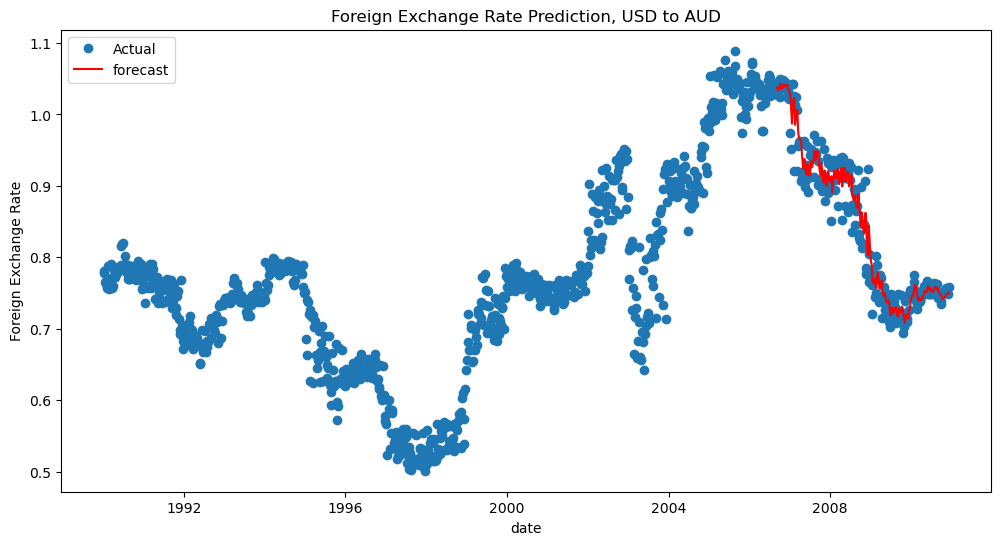

In [58]:
#Plotting the graph with predicted data and resampled weekly data index since the prediction is based on test data.

plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, USD to AUD', xlabel='date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

In [ ]:
# Line Graph: A plot is generated that shows the overall trend of the exchange rate over time.
# This helps in understanding long-term patterns, seasonality, and potential outliers.
# This visualization is crucial as it provides a foundation for model selection.
# Resampling: The dataset is resampled to a weekly frequency to reduce the number
# of observations, which speeds up model fitting and prediction. This step
# balances model performance and computation time.

In [59]:
# ARIMA Model:
# Advantages:
# Flexibility: It can model different types of time series by adjusting the autoregressive (AR) and moving average (MA) components.
# Seasonality Handling: By incorporating seasonal differencing, ARIMA can capture seasonal patterns in the data.
# Performance: ARIMA models generally work well when data exhibits strong autocorrelations, as indicated by the line graph.

In [ ]:
# SARIMA Model 
# Advantages:
# Extends ARIMA by explicitly modeling seasonal components.
# Particularly useful for time series with strong seasonal behavior.
# Performance: Likely better than standard ARIMA if seasonality is strong, as inferred from the visualizations.

In [ ]:
# Good Fit: The model works well for periods with gradual changes in the exchange rate.
# The actual data (blue dots) show significant fluctuations in the exchange rate over 
# time, with clear upward and downward trends.
# The forecasted values (red line) closely follow the actual data during certain
# periods, particularly in the later years (2004–2008).